## Propulsion Plants Decay Evaluation(propulsion.csv)
- Develop a model, to predict the column
  - ‘GT Compressor decay state coefficient’
  - 'GT Turbine decay state coefficient' minimizing ‘rmse’ loss function
- You are encouraged to try out different techniques from ML/DL and share comparative
results
- Please refrain from using very complex architectures in case of deploying deep learning
algorithms
- Use of proper feature selection process and hyperparameter tuning (if required) is
necessary.
- Properly commenting the code is required
- We will use a test set to check the model performance

### Develop a model to predict the column "GT Compressor decay state coefficient"

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import time

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.pipeline import Pipeline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')


# Import Dataset

In [2]:
df = pd.read_csv(r'E:\mechademy\propulsion\propulsion.csv')
dataset = df.copy()

## Data Characteristics

In [3]:
#########################************************************************######################################
# Data Characteristics
def data_characteristics(dataset):
    
    # Shape of dataset
    print('Shape of the Dataset : {}'.format(dataset.shape))
    print('Number of Rows in Dataset : {}'.format(dataset.shape[0]))
    print('Number of Columns in Dataset : {}'.format(dataset.shape[1]))
    print('-'*50)
    
    # Understanding the Number of Categorical and Numerical Features in Dataset
    numeric_features = dataset.select_dtypes(include = [np.number])
    categoric_features = dataset.select_dtypes(exclude = [np.number])
    
    print('Number of Numerical Features : {}'.format(numeric_features.shape[1]))
    print('Number of categoric Features : {}'.format(categoric_features.shape[1]))
    print('-'*50)
    
    # Unique Values
    print('Number of Unique Values : {}'.format(dataset.nunique()))
    print('-'*50)
    
    # Number of NULL Values
    print('Number of Missing Values : {}'.format(dataset.isnull().sum().sum()))
    
    # Understanding the dataset
    print('Information of the Dataset : {}'.format(dataset.info(verbose = False, memory_usage='deep')))
    print('-'*50)

#########################************************************************######################################

# Dataset Characteristics
print(data_characteristics(dataset))

# Statistical Summary of the dataset
print('Statistical Summary of the Dataset:')
dataset.describe(include = 'all', percentiles = [.15, .25, .50, .75, .85]).transpose()

Shape of the Dataset : (10000, 19)
Number of Rows in Dataset : 10000
Number of Columns in Dataset : 19
--------------------------------------------------
Number of Numerical Features : 19
Number of categoric Features : 0
--------------------------------------------------
Number of Unique Values : Unnamed: 0                                       10000
Lever position (lp) [ ]                          9    
Ship speed (v) [knots]                           9    
Gas Turbine shaft torque (GTT) [kN m]            9634 
Gas Turbine rate of revolutions (GTn) [rpm]      3422 
Gas Generator rate of revolutions (GGn) [rpm]    9926 
Starboard Propeller Torque (Ts) [kN]             3880 
Port Propeller Torque (Tp) [kN]                  3880 
HP Turbine exit temperature (T48) [C]            9890 
GT Compressor inlet air temperature (T1) [C]     1    
GT Compressor outlet air temperature (T2) [C]    9694 
HP Turbine exit pressure (P48) [bar]             523  
GT Compressor inlet air pressure (P1) [bar

,count,mean,std,min,15%,25%,50%,75%,85%,max
Unnamed: 0,10000.0,4999.500000,2.886896e+03,0.000,1499.85000,2499.75000,4999.5000,7499.25000,8499.15000,9999.000
Lever position (lp) [ ],10000.0,5.150075,2.624015e+00,1.138,2.08800,3.14400,5.1400,7.14800,8.20600,9.300
Ship speed (v) [knots],10000.0,14.951400,7.740467e+00,3.000,6.00000,9.00000,15.0000,21.00000,24.00000,27.000
Gas Turbine shaft torque (GTT) [kN m],10000.0,27100.647713,2.206278e+04,253.547,4946.15050,8375.79150,21630.1335,39000.71025,50994.29060,72783.338
Gas Turbine rate of revolutions (GTn) [rpm],10000.0,2131.151788,7.722117e+02,1307.675,1382.87900,1386.75800,1924.3250,2678.07800,3087.51515,3560.741
Gas Generator rate of revolutions (GGn) [rpm],10000.0,8194.182366,1.090569e+03,6589.002,6783.31235,7056.52050,8480.5270,9132.13250,9312.13005,9797.103
Starboard Propeller Torque (Ts) [kN],10000.0,225.957785,1.997379e+02,5.304,24.54600,60.31700,175.2640,332.36000,438.06115,645.249
Port Propeller Torque (Tp) [kN],10000.0,225.957785,1.997379e+02,5.304,24.54600,60.31700,175.2640,332.36000,438.06115,645.249
HP Turbine exit temperature (T48) [C],10000.0,734.476177,1.730092e+02,444.731,569.44245,589.84100,705.3510,833.15475,926.79760,1115.797
GT Compressor inlet air temperature (T1) [C],10000.0,288.000000,0.000000e+00,288.000,288.00000,288.00000,288.0000,288.00000,288.00000,288.000


In [4]:
# Head of the dataset
dataset.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


## Percentage of Null Values

In [5]:
# Percentage of Null Vlues
def check_null(dataset):
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
                
    except:
        print("There is NO Null values in the dataset")
        print("Returning the dataset....")
        return dataset
    
    return null_plot

#----------------------------------------------------------------------------#
                
check_null(dataset)

There is NO Null values in the dataset
Returning the dataset....


,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2.088,6.0,5858.780,1349.023,6736.273,23.171,23.171,581.017,288.0,564.922,1.294,0.998,6.991,1.019,21.583,0.245,0.999,0.988
9996,9996,5.140,15.0,21633.743,1924.349,8497.158,175.288,175.288,696.232,288.0,635.894,2.078,0.998,10.947,1.026,24.481,0.485,0.971,1.000
9997,9997,8.206,24.0,50994.819,3087.555,9324.455,438.051,438.051,928.531,288.0,737.443,3.560,0.998,18.200,1.041,60.306,1.194,0.953,0.996
9998,9998,6.175,18.0,29761.078,2306.850,8793.302,245.973,245.973,783.490,288.0,668.558,2.513,0.998,13.412,1.030,34.919,0.691,0.982,0.975


<Figure size 1008x720 with 0 Axes>

In [6]:
dataset.isnull().sum()

Unnamed: 0                                       0
Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor decay state coefficient.           0
GT Turbine decay state coefficient.              0
dtype: int64

#### Dropping the less useless features

In [7]:
dataset = dataset.drop('Unnamed: 0',axis =1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Lever position (lp) [ ]                          10000 non-null float64
Ship speed (v) [knots]                           10000 non-null float64
Gas Turbine shaft torque (GTT) [kN m]            10000 non-null float64
Gas Turbine rate of revolutions (GTn) [rpm]      10000 non-null float64
Gas Generator rate of revolutions (GGn) [rpm]    10000 non-null float64
Starboard Propeller Torque (Ts) [kN]             10000 non-null float64
Port Propeller Torque (Tp) [kN]                  10000 non-null float64
HP Turbine exit temperature (T48) [C]            10000 non-null float64
GT Compressor inlet air temperature (T1) [C]     10000 non-null float64
GT Compressor outlet air temperature (T2) [C]    10000 non-null float64
HP Turbine exit pressure (P48) [bar]             10000 non-null float64
GT Compressor inlet air pressure (P1) [bar]      10000 non-null float64
GT Compressor outlet air pre

## Statistical Test
- ANOVA Test
- Mutual Information

Index(['Gas Generator rate of revolutions (GGn) [rpm]', 'GT Compressor outlet air temperature (T2) [C]'], dtype='object')

,features,f,p


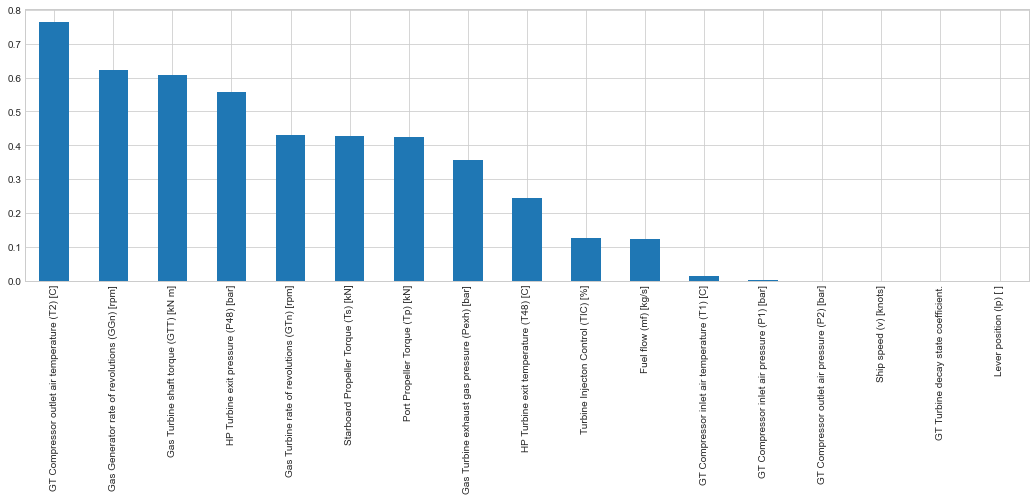

In [8]:
#### Some Statistical Test
## ANOVA Test
class statistical_tests:
    def __init__(self,train,target):
        self.train = train
        self.target = target
    ##################################################################
    
    def Anova(self):
        from scipy import stats
        
        train = self.train
        target = self.target
        categoric_features = self.train.select_dtypes(exclude = [np.number]).columns
        train[categoric_features] = train[categoric_features].fillna('missing')
        
        # Marking the Anova
        anova = { 
            'features' : [],
            'f': [], 
            'p': []
                }
        for cat in train[categoric_features]:
            group_prices = []
            
            for group in train[cat].unique():
                group_prices.append(train[train[cat]== group][target].values)
                
            f,p = stats.f_oneway(*group_prices)
            anova['features'].append(cat)
            anova['f'].append(f)
            anova['p'].append(p)
            
        anova = pd.DataFrame(anova)
        anova = anova[['features','f','p']]
        anova.sort_values('p',inplace = True)
        
        return anova
    
    ##################################################################
    
    
    def mutual_information(self):
        
        train = self.train
        target = self.target 
        # Choosing the numeric features
        numeric = ['int16','int32','int64','float16','float32','float64']
        numeric_vars = list(self.train.select_dtypes(include = numeric).columns)
        train = self.train[numeric_vars]
        
        # Splitting the numerical dataset into train and test set
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(train.drop(target,axis =1),
                                                        train[target],
                                                        test_size = 0.3,
                                                        random_state = 0)
        
        from sklearn.feature_selection import mutual_info_regression
        from sklearn.feature_selection import SelectPercentile
        
        mi = mutual_info_regression(x_train,y_train)
        mi = pd.Series(mi)
        mi.index = x_train.columns
        mi = mi.sort_values(ascending = False)
        
        # Plotting the Bar-plot of the dataset
        mi.sort_values(ascending = False).plot.bar(figsize = (18,5)) 
    
        # Selecting the best Numeric Features
        features = SelectPercentile(mutual_info_regression,
                                   percentile = 10).fit(x_train.fillna(0),y_train)
        
        # Returning the Support of the Columns of the x_train
        return x_train.columns[features.get_support()]
    
    #####################################################################
    
# Accessing the class + method
sts = statistical_tests(dataset,'GT Compressor decay state coefficient.')
sts.mutual_information()
sts.Anova()

### Evaluating the Target Variable

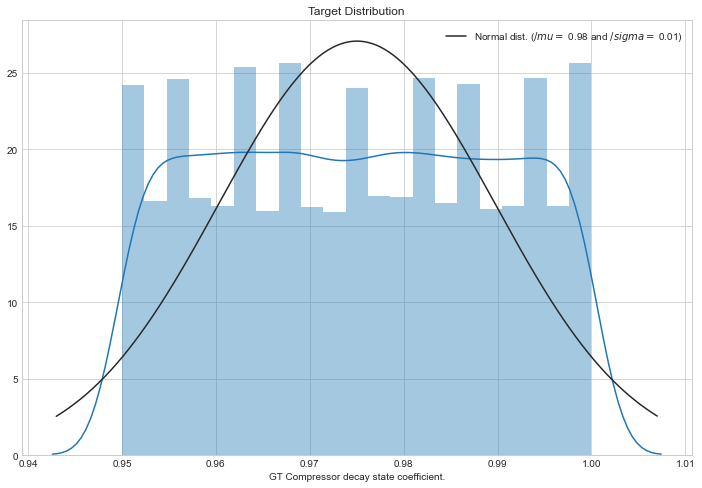

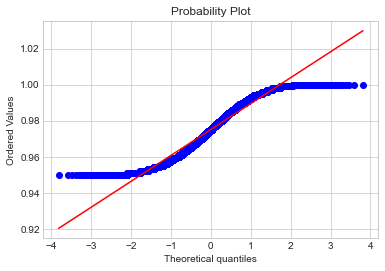

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
        3.58545756,  3.81060943]), array([0.95, 0.95, 0.95, ..., 1.  , 1.  , 1.  ])), (0.014395812923525039, 0.9750208, 0.9767497889161373))
--------------------------------------------------


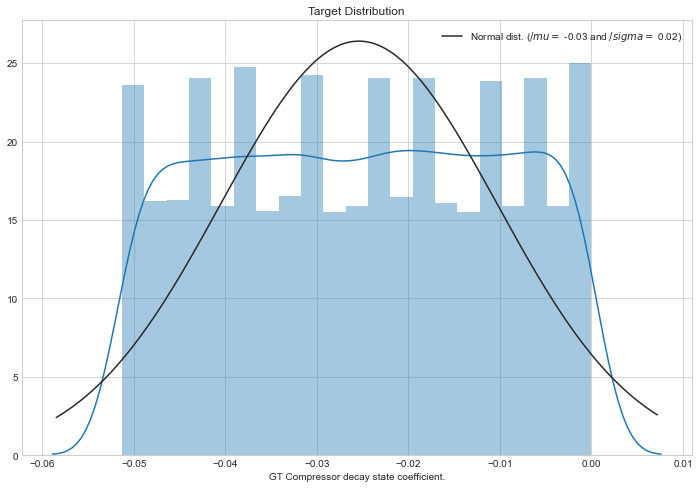

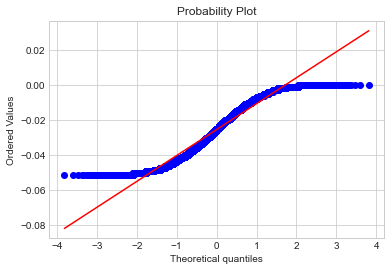

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
        3.58545756,  3.81060943]), array([-0.05129329, -0.05129329, -0.05129329, ...,  0.        ,
        0.        ,  0.        ])), (0.014766416374827661, -0.025410658340923865, 0.9767516111353556))
--------------------------------------------------


In [9]:
class Transform_target_distribution:
    def __init__(self, target):
        self.target = target
     
    # -------------------- FUNCTION 1: INITIAL DISTRIBUTION -----------------------------#
    # Initial distribution of the Target
    def check_target_distribution(self):
        from scipy import stats
        plt.figure(figsize = (12,8))
        plot1 = sns.distplot(self.target , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(self.target)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot2 = stats.probplot(self.target, plot = plt)
        plt.show()
    
        # printing the plots
        print(plot1)
        print(plot2)
        print("-"*50)
   
    # -------------------- FUNCTION 2: TRANSFORMED DISTRIBUTION -------------------------#
    # Transforming the distribution of the Target
    def log_distribution(self):
        from scipy import stats
        target2 = np.log(self.target)
        plt.figure(figsize = (12,8))
        plot3 = sns.distplot(target2 , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(target2)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot4 = stats.probplot(target2, plot = plt)
        plt.show()
    
        print(plot3)
        print(plot4)
        print("-"*50)
        
    #---------------------------------------------------------------------------------------
    

# Accessing the Class
object = Transform_target_distribution(dataset['GT Compressor decay state coefficient.'])
object.check_target_distribution()
object.log_distribution()

# # Changing Saleprice to log(SalePrice)
# train["SalePrice"] = np.log(train["SalePrice"])

### Correration-Coefficient

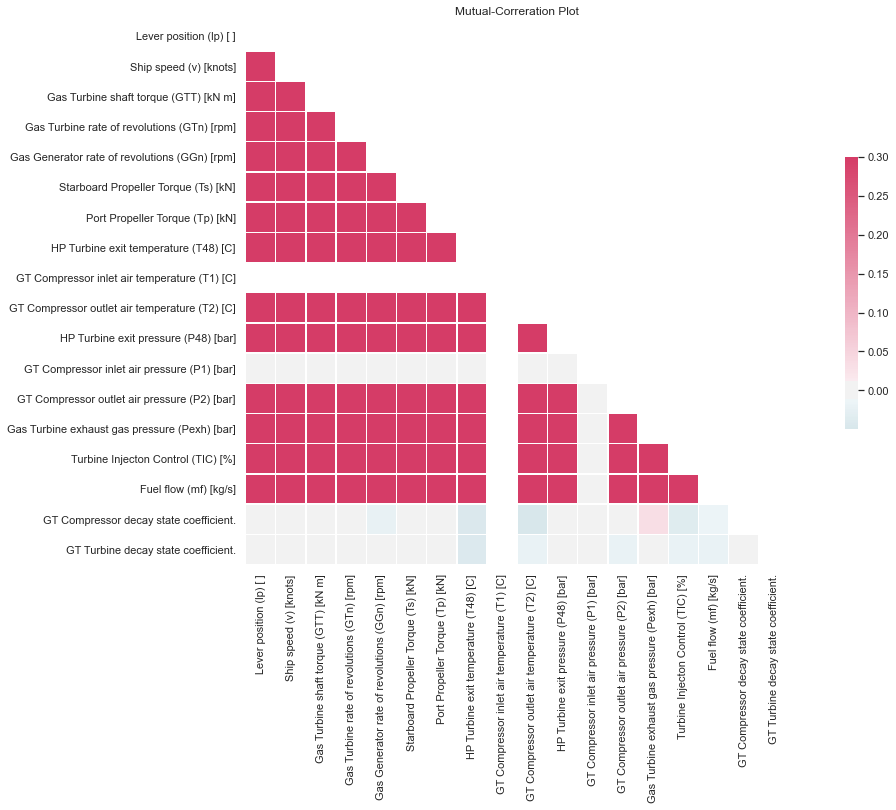

----------------------------------------
Number of Correrated features: 13
List of Correrated Features: ['GT Compressor outlet air pressure (P2) [bar]', 'Ship speed (v) [knots]', 'Fuel flow (mf) [kg/s]', 'Gas Turbine shaft torque (GTT) [kN m]', 'HP Turbine exit temperature (T48) [C]', 'Gas Turbine rate of revolutions (GTn) [rpm]', 'Starboard Propeller Torque (Ts) [kN]', 'Gas Turbine exhaust gas pressure (Pexh) [bar]', 'Gas Generator rate of revolutions (GGn) [rpm]', 'Port Propeller Torque (Tp) [kN]', 'HP Turbine exit pressure (P48) [bar]', 'Turbine Injecton Control (TIC) [%]', 'GT Compressor outlet air temperature (T2) [C]']
----------------------------------------
                                         feature_1  \
0    Ship speed (v) [knots]                          
1    Lever position (lp) [ ]                         
2    GT Compressor outlet air pressure (P2) [bar]    
3    HP Turbine exit pressure (P48) [bar]            
4    Starboard Propeller Torque (Ts) [kN]            
..

In [10]:
# Correration-Coefficient class
class Correration:
    def __init__(self, dataset):
        self.dataset = dataset
        
    
    # ------------------------ FUNCTION 1: CORRERATION-COEFFICIENT ------------------------#
    # Making a Correration-coefficient plot
    def correration_coefficient(self):
        # taking only numeric columns + corr_matrix
        numeric_features = self.dataset.select_dtypes(include = [np.number])
        corr_matrix = numeric_features.corr()
        
        # Setting style + mask + axes + custom_cmap
        sns.set(style = "white")
        mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
        f, ax = plt.subplots(figsize = (20, 10))
        cmap = sns.diverging_palette(220, 1, as_cmap=True)
        
        # Setting the Heatmap
        sns.heatmap(data = corr_matrix, 
                    mask=mask, 
                    cmap=cmap, 
                    vmax=.3, 
                    center=0,
                    square=True, 
                    linewidths=.5, 
                    cbar_kws={"shrink": .5})
        
        plt.title("Mutual-Correration Plot")
        plt.show()
    
    # ----------------------- FUNCTION 2: CORRERATED-FEATURES ---------------------------#
    # Getting the list of Correrated features
    def select_correration(self):
        # making a set
        corr_set = set()
    
        # making a corr matrix
        corr_matrix = self.dataset.corr()
    
        # select value under some threshold
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > 0.5:
                    matrix = corr_matrix.columns[i]
                
                    # adding the values in set
                    corr_set.add(matrix)
    
        print("-"*40)
        print("Number of Correrated features: {}".format(len(corr_set)))
        print("List of Correrated Features: {}".format(list(corr_set)))
        print("-"*40)
    
    
    # --------------------- FUNCTION 3: FEATURES-CORRERATION ----------------------------#
    def feature_correration(self):
        corr_matrix = self.dataset.corr()
        corr_matrix = corr_matrix.abs().unstack()
        corr_matrix = corr_matrix.sort_values(ascending = False)
    
        #select values of corr_matrix above the threshold set
        corr_matrix = corr_matrix[(corr_matrix >= 0.5) & (corr_matrix < 1)]
    
        corr_matrix = pd.DataFrame(corr_matrix).reset_index()
        corr_matrix.columns = ["feature_1","feature_2", "correration"]
    
        print(corr_matrix)
    
    #------------------------------------------------------------------------------------#
        
# Accessing the Correration Class + methods
corr_class = Correration(dataset)
corr_class.correration_coefficient()
corr_class.select_correration()
corr_class.feature_correration()


## Numerical Feature Analysis

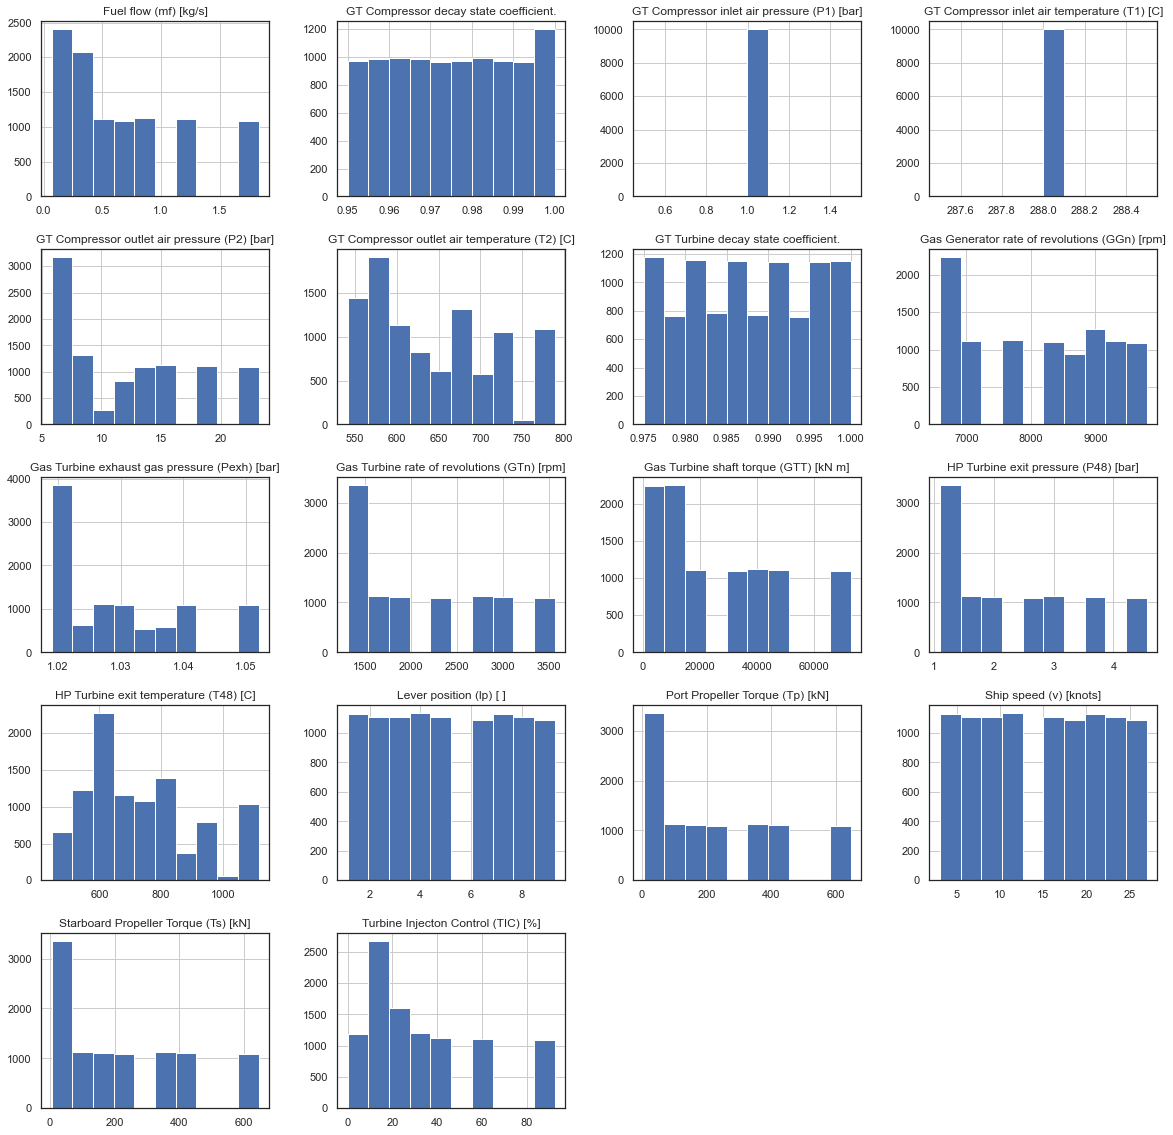

In [11]:
# Numerical Feature Analysis
class Numerical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
    
    # ------------------------------- FUNCTION 1: DISTRIBUTIONS ---------------------------------------------#
    def distribution_plot(self):
        # Selecting the numeric features
        numeric_feature = self.dataset.select_dtypes(include = [np.number])
        # making  a copy + histplot
        c_data = numeric_feature.copy()
        c_data.hist(figsize = (20,20))
        plt.show()
        
    # -----------------------------------------------------------------------------------------------------#

nfa = Numerical_feature_analysis(dataset, dataset)
nfa.distribution_plot()

# Data Cleaning 
- Handling Missing Values
- Handling Outliers

In [12]:
# Displaying different features of the dataset
def dataset_info(dataset):
    # displaying the keys of the dataset
    print("Total Features of the Dataset - ")
    print(dataset.keys())
    print("-"*100)
    
    # displaying the Numeric features
    print("Numerical Features of the Dataset - ")
    numeric = dataset.select_dtypes(include = [np.number])
    print(numeric.keys())
    print("-"*100)
    
    # displaying the categoric features
    print("Categorical Features of the Dataset - ")
    categoric = dataset.select_dtypes(exclude = [np.number])
    print(categoric.keys())
    print("-"*100)

# --------------------------------------------------------------------------------------------------------#
dataset_info(dataset)

Total Features of the Dataset - 
Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')
----------------------------------------------------------------------------------------------------


<Figure size 3600x2880 with 0 Axes>

<AxesSubplot:>

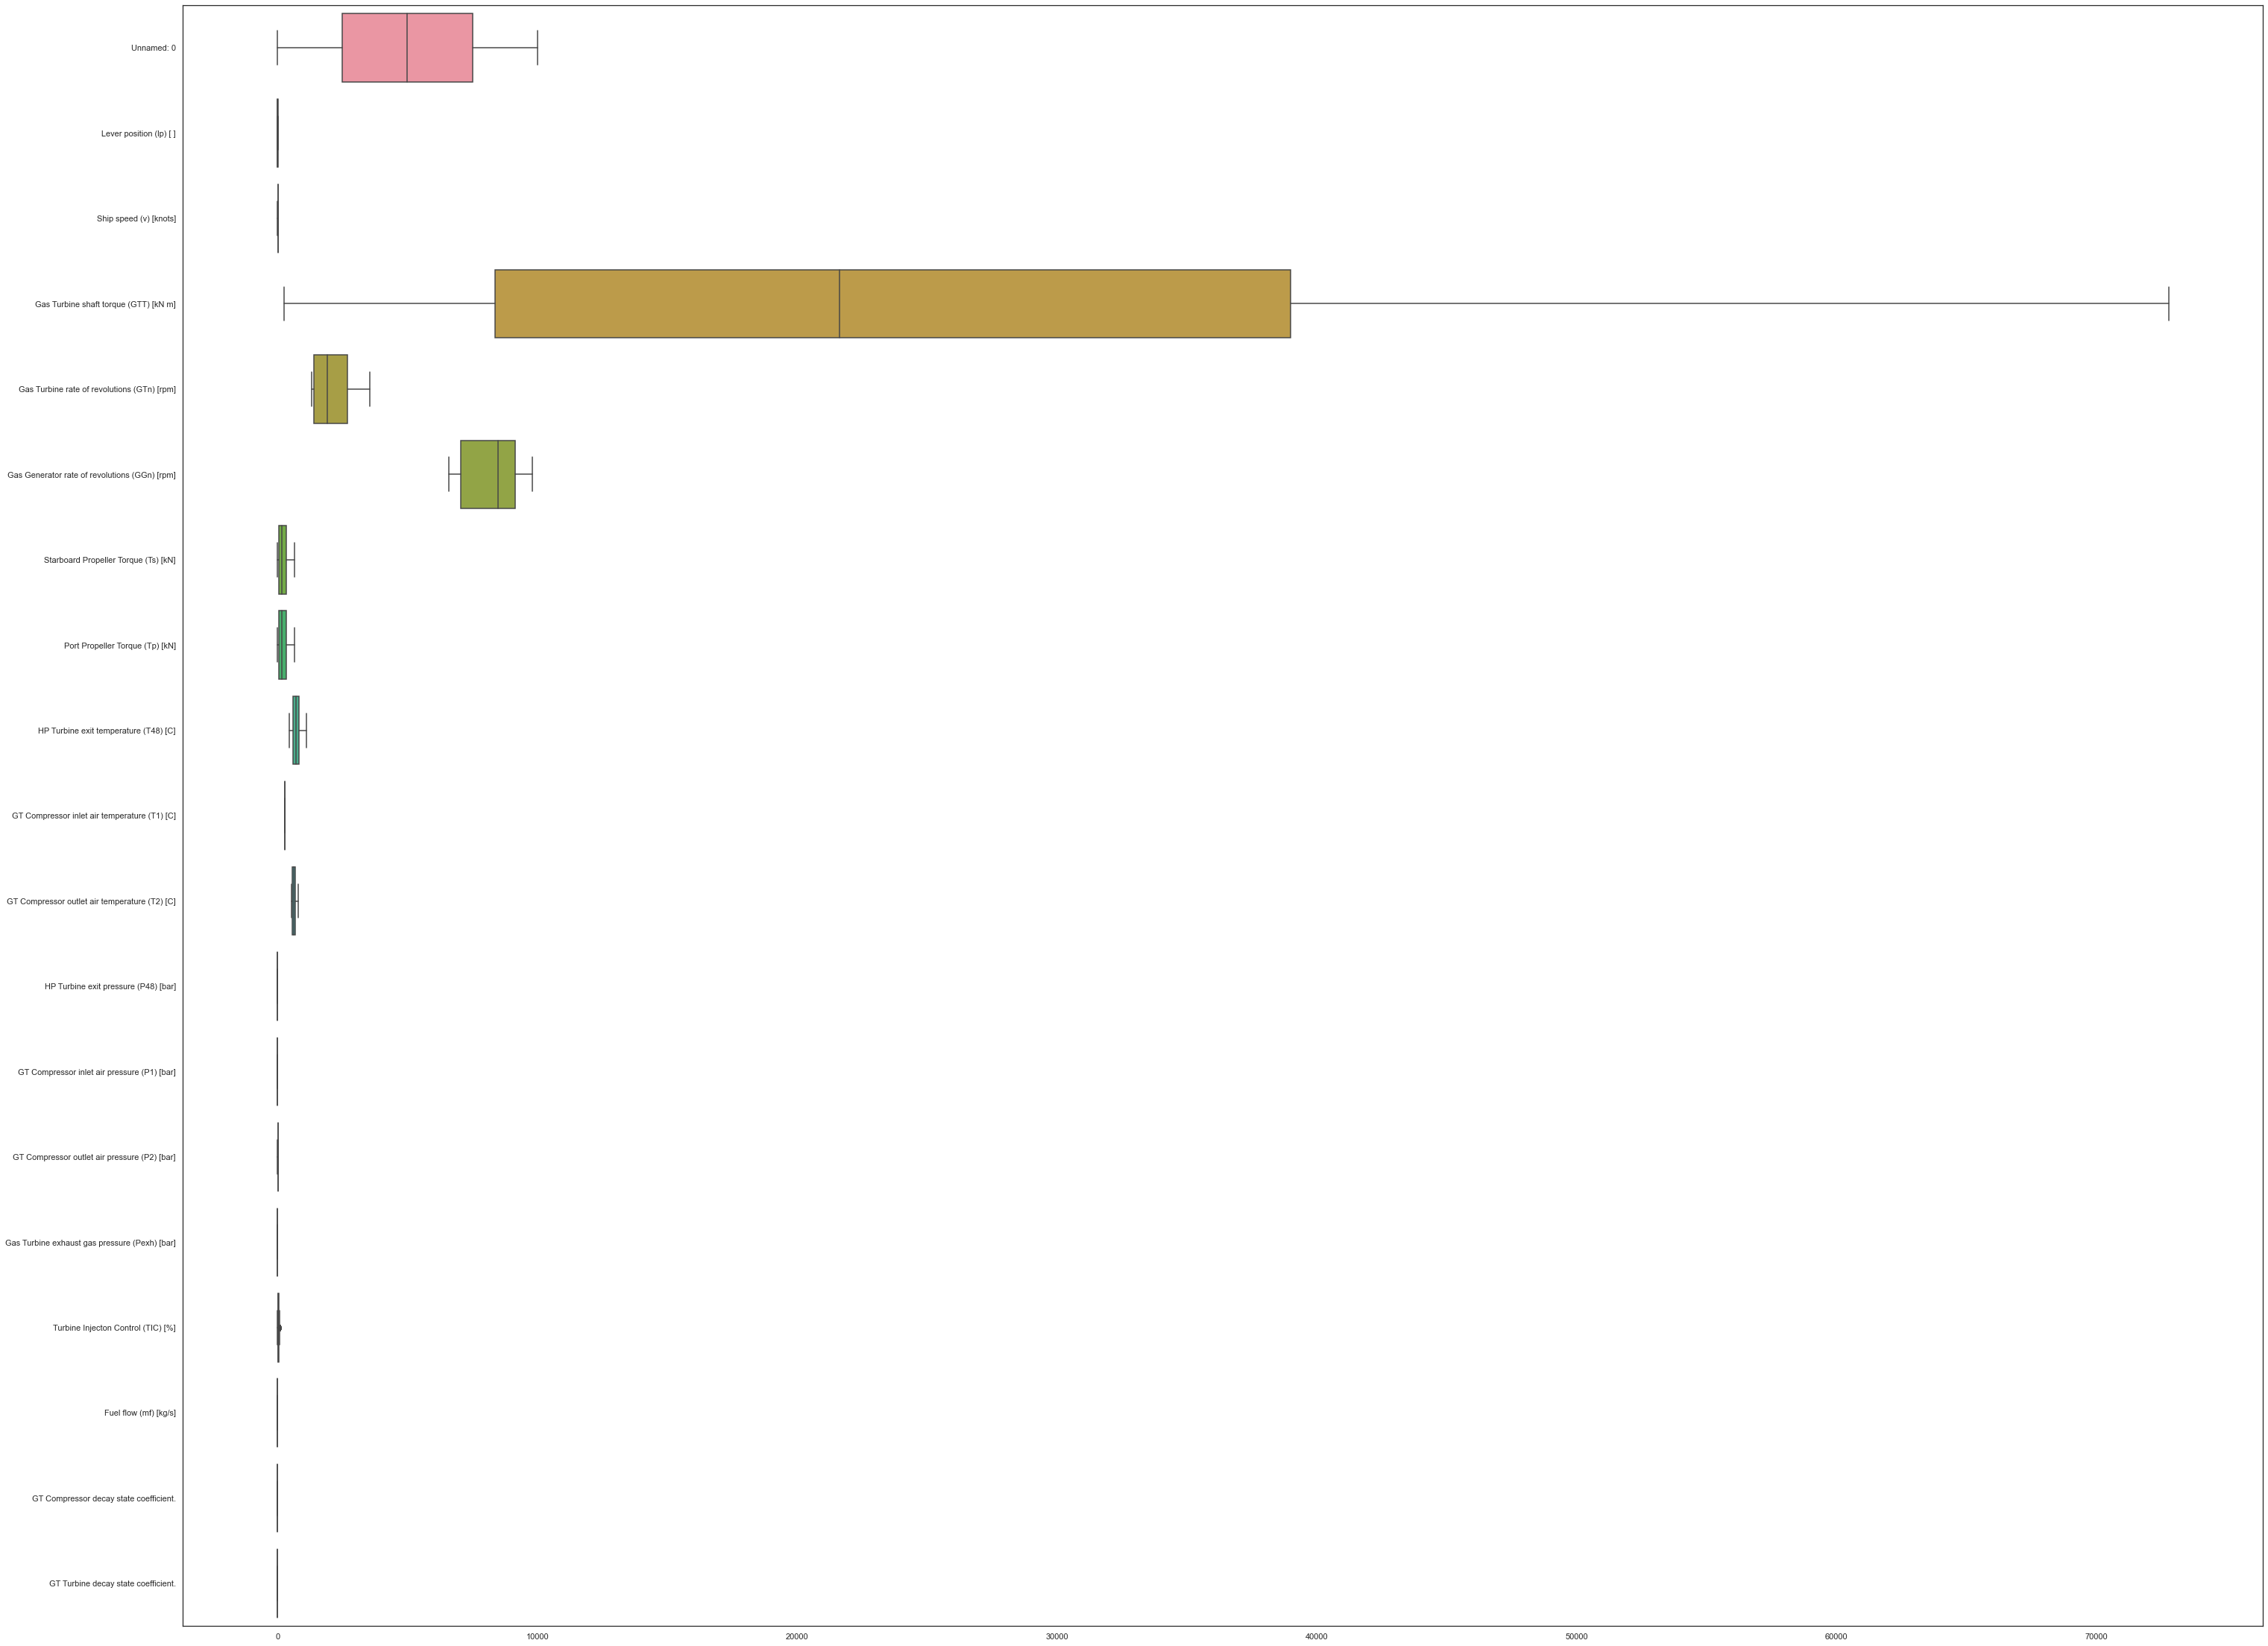

In [13]:
plt.figure(figsize = (50,40))
sns.boxplot(data = df, orient='h')

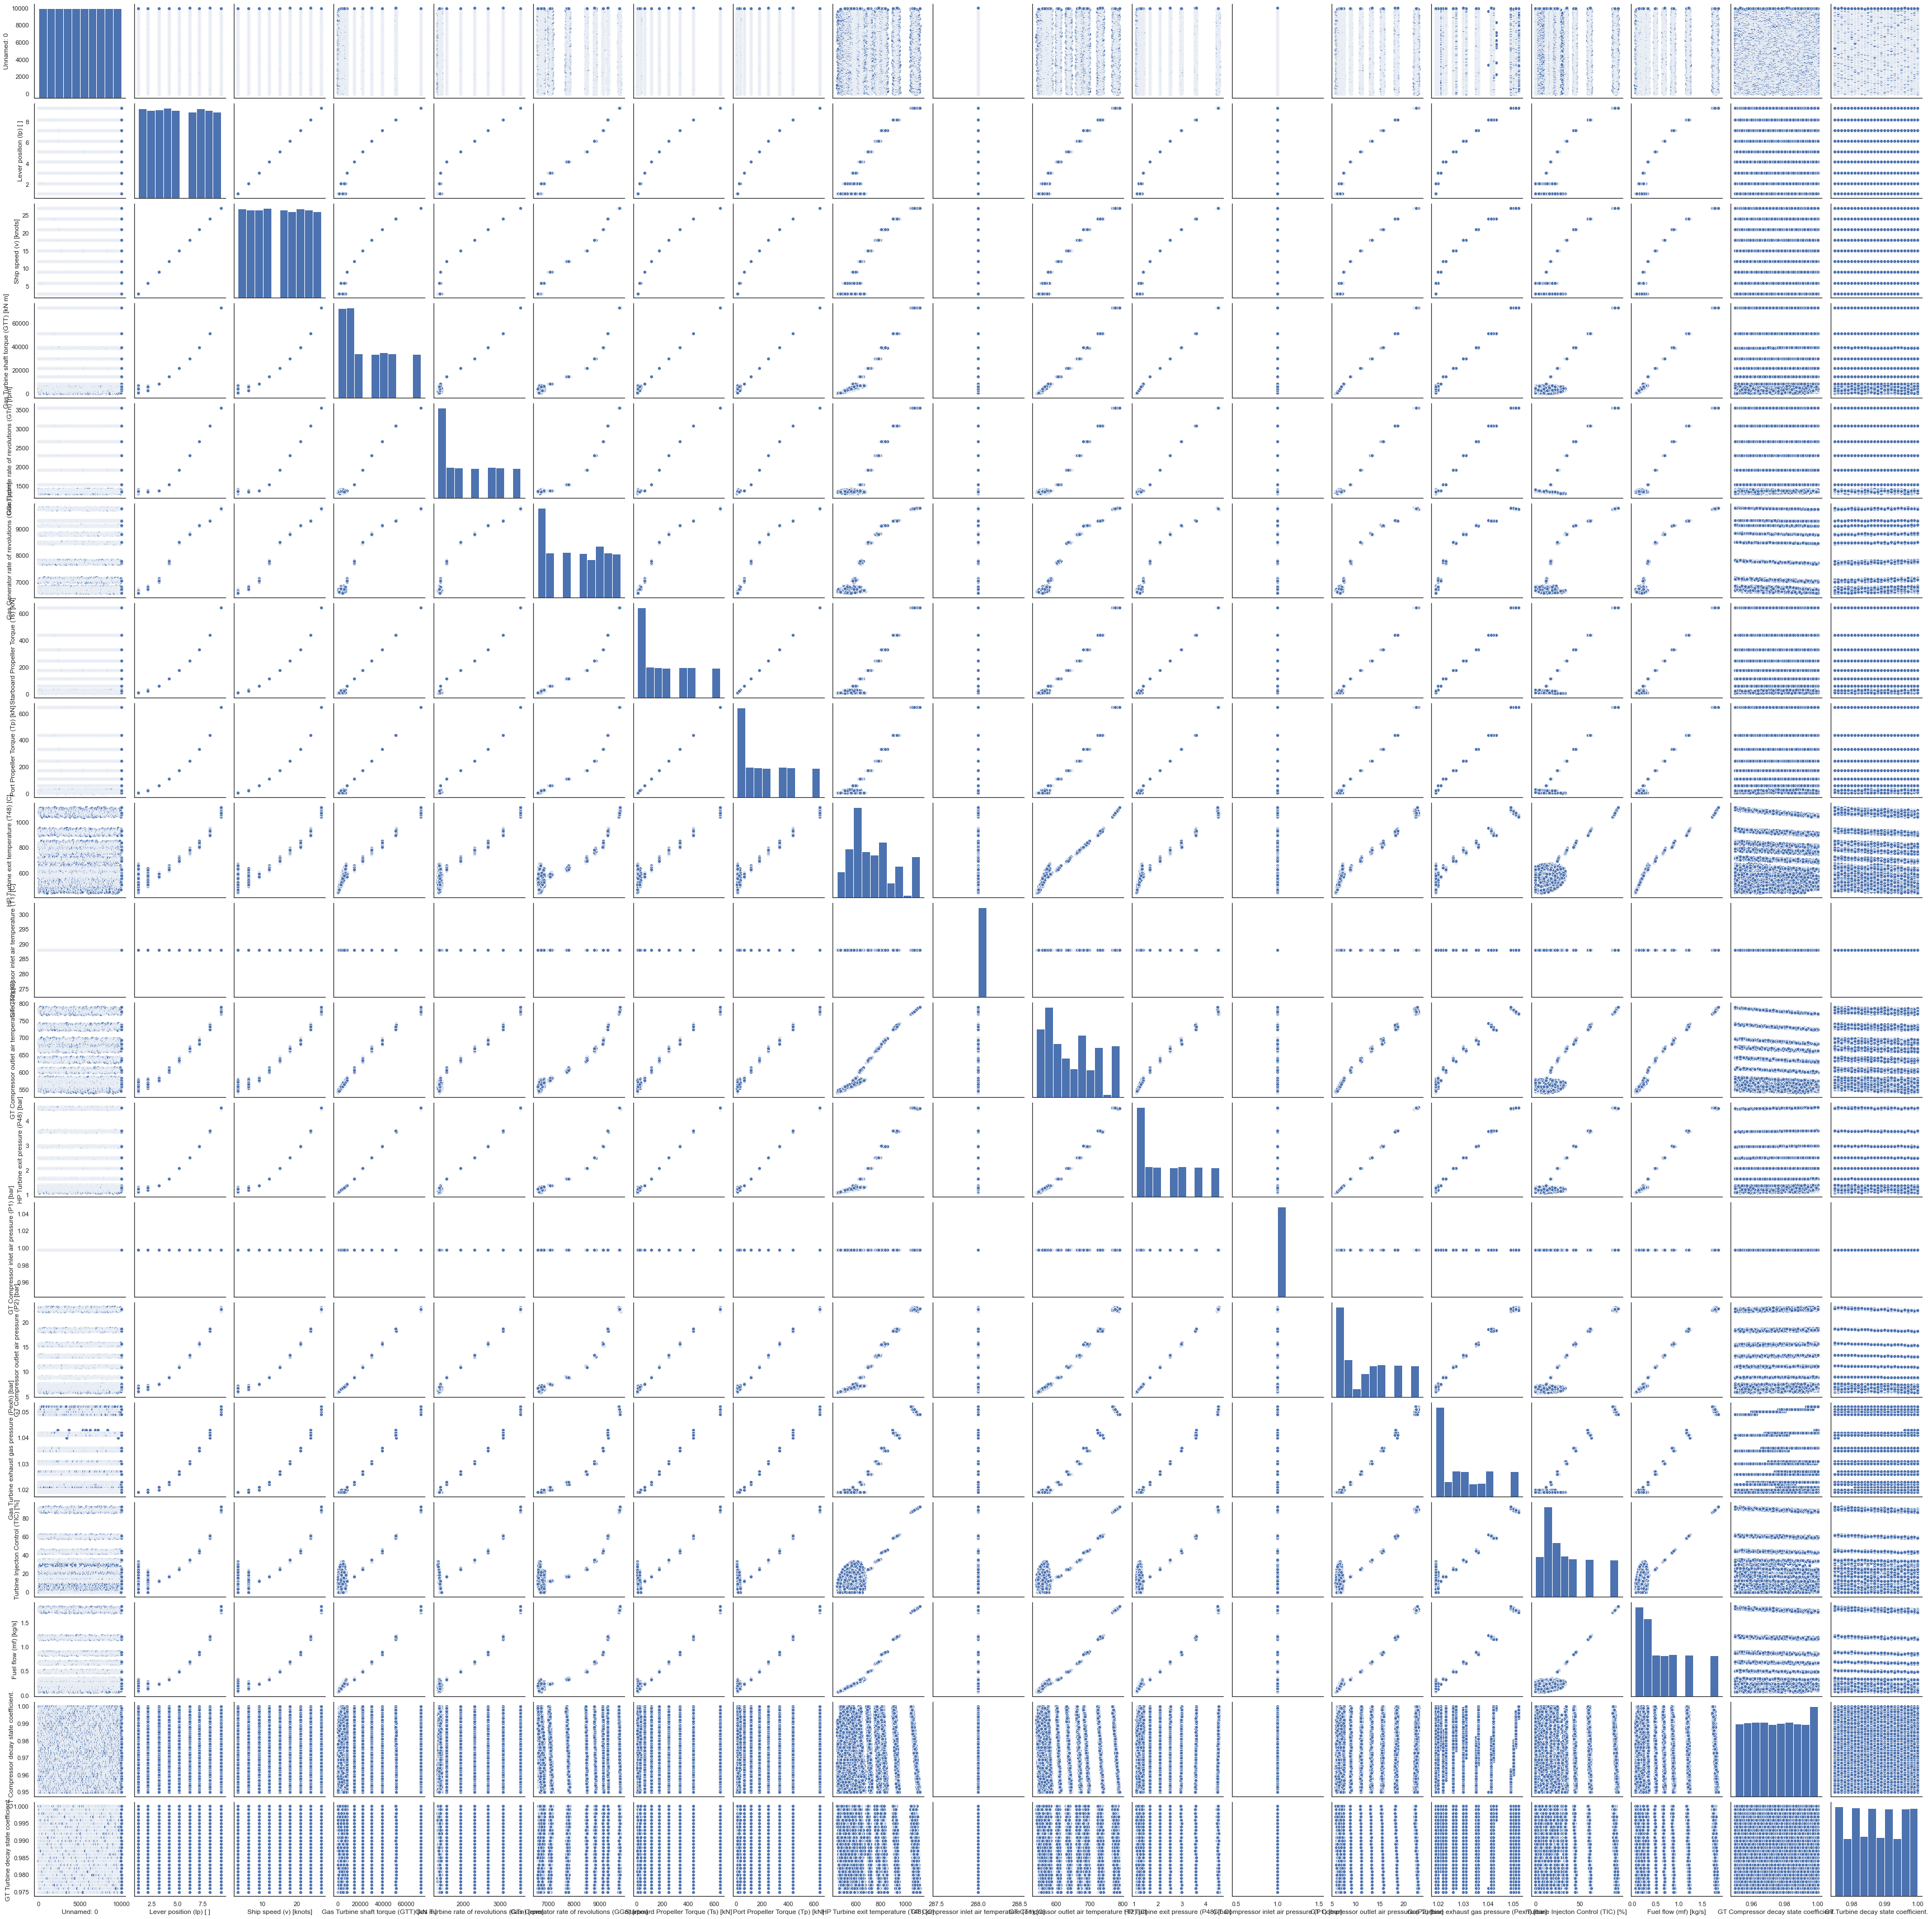

In [14]:
sns.pairplot(data = df)

# Feature Selection

In [15]:
X = dataset.drop('GT Compressor decay state coefficient.',axis = 1)
X.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.980


In [16]:
y = dataset['GT Compressor decay state coefficient.']
y

0       0.973
1       0.995
2       0.980
3       0.984
4       0.998
        ...  
9995    0.999
9996    0.971
9997    0.953
9998    0.982
9999    0.981
Name: GT Compressor decay state coefficient., Length: 10000, dtype: float64

In [17]:
def f_classifier(X,y):
    """ In this func we will calculate the p value of all the feature of the dataset
    """
    #Import the f_classif function and feed in the features and response:
    [f_stat, f_p_value] = f_classif(X, y)
    
    #create a DataFrame of feature names, F-statistics, and p-values, and show it sorted on p-value:
    f_test_df = pd.DataFrame({'Feature':X.columns,
                              'F statistic':f_stat,
                              'p value':f_p_value})
    print(f_test_df.sort_values('p value'))
    
    return f_test_df

In [18]:
def best_feature(X,y):
    """ This func will return the best feature for our model building
    """
    # Import the SelectPercentile class:
     #To select the top 50% of features according to the F-test
    #from sklearn.feature_selection import SelectPercentile
    #Use the .fit method to fit the object on our features and response data, similar to how a model would be fit:
    
    selector = SelectPercentile(f_classif, percentile=50)
    selector.fit(X, y)
    
    #Capture the indices of the selected features in an array named best_feature_ix:
    best_feature_ix = selector.get_support()
    
    #The feature names can be obtained using all but the last element (the response variable name) of our features_response list by indexing with :-1:
    features = X.columns
    
    best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
    print(best_features)

In [19]:
def get_corr_matrix(X,y):
    #correlation map
    f,ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(X.join(y).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
f_test_df = f_classifier(X,y)

                                          Feature  F statistic   p value
9   GT Compressor outlet air temperature (T2) [C]  0.680016     0.959074
7   HP Turbine exit temperature (T48) [C]          0.600168     0.988687
14  Turbine Injecton Control (TIC) [%]             0.501909     0.998726
13  Gas Turbine exhaust gas pressure (Pexh) [bar]  0.439181     0.999803
15  Fuel flow (mf) [kg/s]                          0.266013     1.000000
4   Gas Generator rate of revolutions (GGn) [rpm]  0.245385     1.000000
10  HP Turbine exit pressure (P48) [bar]           0.209577     1.000000
2   Gas Turbine shaft torque (GTT) [kN m]          0.208632     1.000000
12  GT Compressor outlet air pressure (P2) [bar]   0.207348     1.000000
5   Starboard Propeller Torque (Ts) [kN]           0.202174     1.000000
6   Port Propeller Torque (Tp) [kN]                0.202174     1.000000
3   Gas Turbine rate of revolutions (GTn) [rpm]    0.194453     1.000000
0   Lever position (lp) [ ]                        

In [21]:
best_feature(X,y)

['Gas Turbine shaft torque (GTT) [kN m]', 'Gas Generator rate of revolutions (GGn) [rpm]', 'HP Turbine exit temperature (T48) [C]', 'GT Compressor outlet air temperature (T2) [C]', 'HP Turbine exit pressure (P48) [bar]', 'Gas Turbine exhaust gas pressure (Pexh) [bar]', 'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]']


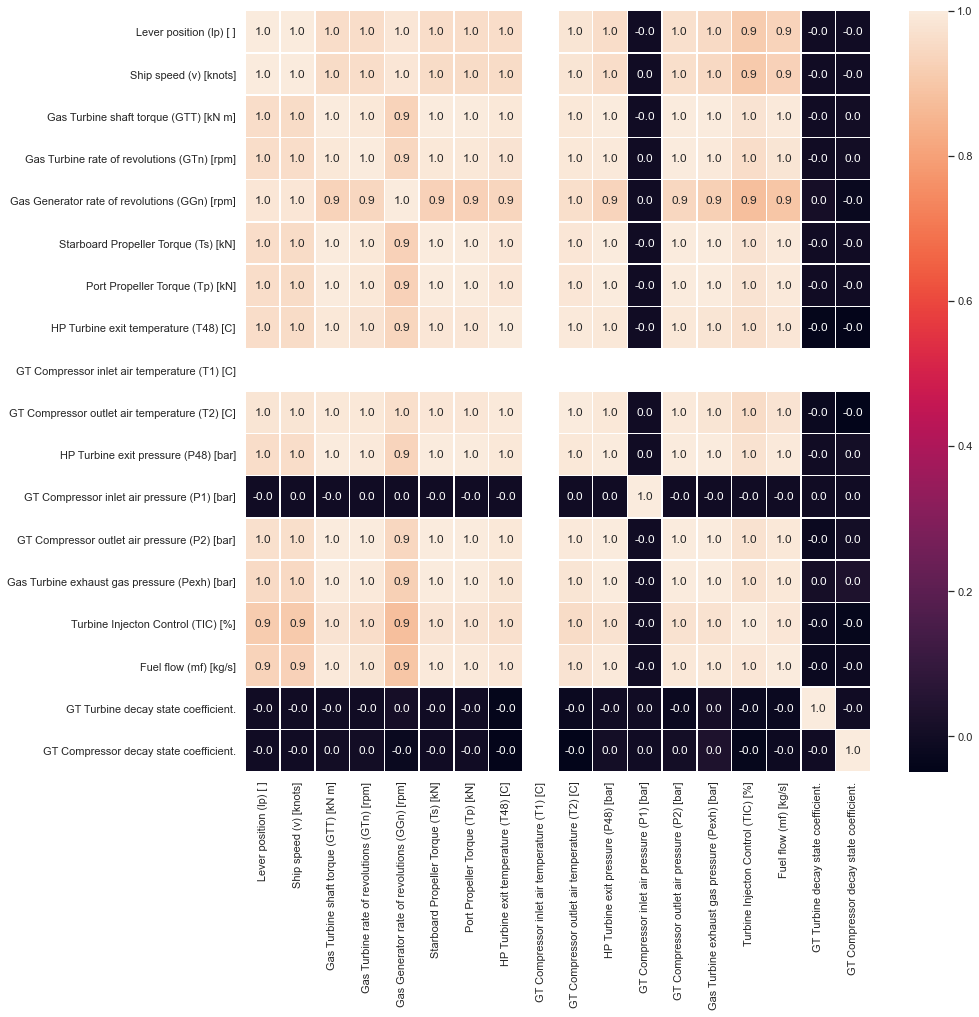

In [22]:
get_corr_matrix(X,y)

## Splitting the data into train and test set

In [23]:
def split(X,y):
    # train and test split
    return train_test_split(X, y, shuffle = False)

In [24]:
X_train,X_test,y_train,y_test = split(X,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7500, 17) (2500, 17) (7500,) (2500,)


### Create Baseline Model on the Training set

In [25]:
models_list = []
models_list.append(('LR', LinearRegression()))
models_list.append(('CART', DecisionTreeRegressor()))
models_list.append(('RF', RandomForestRegressor()))
models_list.append(('ADA', AdaBoostRegressor()))
models_list.append(('GBC', GradientBoostingRegressor()))

### Using KFold Cross-Validation to get score of different models

In [26]:
num_folds = 10
results= []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=make_scorer(mean_squared_error))
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (run time: %f)" % (name, cv_results.mean(), end-start))

LR: 0.000022 (run time: 0.118914)
CART: 0.000002 (run time: 0.840741)
RF: 0.000001 (run time: 47.764668)
ADA: 0.000174 (run time: 1.916263)
GBC: 0.000015 (run time: 18.834996)


In [27]:
results

[array([2.03728252e-05, 2.20191675e-05, 2.33125927e-05, 2.07266344e-05,
        2.21158008e-05, 2.24202506e-05, 2.36482107e-05, 2.17877909e-05,
        1.83863116e-05, 2.16041184e-05]),
 array([3.09600000e-06, 1.57600000e-06, 2.27733333e-06, 1.72266667e-06,
        2.61600000e-06, 2.58800000e-06, 1.77733333e-06, 2.36266667e-06,
        4.08266667e-06, 2.74666667e-06]),
 array([8.72533600e-07, 4.11663200e-07, 8.57184267e-07, 6.52924533e-07,
        5.96638400e-07, 8.71413200e-07, 5.02325467e-07, 1.17028120e-06,
        8.18382667e-07, 7.59226800e-07]),
 array([0.00021085, 0.00015747, 0.00018039, 0.0001617 , 0.00017344,
        0.00017105, 0.0001728 , 0.00017368, 0.00016708, 0.00017113]),
 array([1.67055228e-05, 1.10347125e-05, 1.71121595e-05, 1.41543699e-05,
        1.68203530e-05, 1.48112982e-05, 1.38519468e-05, 1.63711634e-05,
        1.42858971e-05, 1.38417591e-05])]

Text(0.5, 0.98, 'Performance Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9a4a146a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9a4a14c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9a4a145f8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c9a4a24240>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c9a4a24518>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'CART'),
 Text(3, 0, 'RF'),
 Text(4, 0, 'ADA'),
 Text(5, 0, 'GBC')]

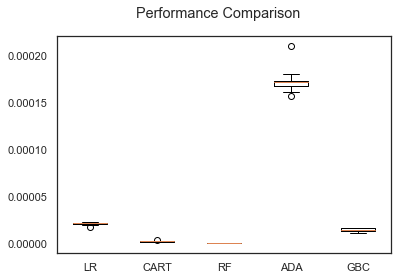

In [28]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Creating a Pipeline on the Training set
- Firstly Standardize the dataset
- Train the model on standardize dataset

In [29]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledGBR', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor())])))

In [30]:
num_folds = 10
results= []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=make_scorer(mean_squared_error))
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (run time: %f)" % (name, cv_results.mean(), end-start))

ScaledCART: 0.000002 (run time: 0.867650)
ScaledLR: 0.000022 (run time: 0.124284)
ScaledRF: 0.000001 (run time: 51.281210)
ScaledGBR: 0.000015 (run time: 21.126098)


Text(0.5, 0.98, 'Performance Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9a455eeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9a456e4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9a455ee10>,
 'medians': [<matplotlib.lines.Line2D at 0x1c9a456ea58>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c9a456ecf8>,
 'means': []}

[Text(1, 0, 'ScaledCART'),
 Text(2, 0, 'ScaledLR'),
 Text(3, 0, 'ScaledRF'),
 Text(4, 0, 'ScaledGBR')]

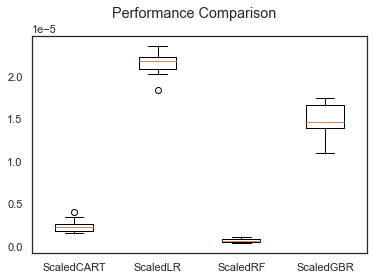

In [31]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
## Hyper Parameter Optimization
param = {
    'max_depth':[3,6,7,9,12],
    'n_estimators' : [10,50,100,200] 
}

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [34]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),n_jobs=-1,cv=5,verbose=3)

In [35]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    8.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 7, 9, 12],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [36]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

0.000009 with: {'n_estimators': 100, 'max_depth': 12}
Best parameters with the minimum Mean Square Error are: {'n_estimators': 100, 'max_depth': 12}
0.000165 with: {'n_estimators': 50, 'max_depth': 3}
0.000010 with: {'n_estimators': 10, 'max_depth': 12}
0.000166 with: {'n_estimators': 10, 'max_depth': 3}
0.000099 with: {'n_estimators': 10, 'max_depth': 6}


In [48]:
rf = RandomForestRegressor(
    n_estimators=200, max_depth=12,
)

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=200)

In [50]:
#Predicting the Test set results
y_PRED = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def Evaluation(model,y,y_pred):
    
    score = r2_score(y,y_pred)
    print("Score:",100*score)
    print("MAE : %.4g" % (mean_absolute_error(y,y_pred)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
# 
Evaluation(model,y_train,y_PRED)

Score: 96.42503644354308
MAE : 0.001384
RMSE : 0.002789


In [52]:
Evaluation(model,y_test,y_pred)

Score: 96.26140690383822
MAE : 0.001552
RMSE : 0.002837


In [53]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score

def cross_validation(model,X,y):
    
    y_pred = model.predict(X)
    #Perform cross-validation:
    cv_score = cross_val_score(model,X,y, cv=10, scoring='neg_root_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print("\nModel Report")
    print("MAE : %.4g" % (mean_absolute_error(y,y_pred)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
# Validation of Whole data set   
cross_validation(rf,X,y)


Model Report
MAE : 0.001426
RMSE : 0.002801
CV Score : Mean - 0.05513 | Std - 0.001415 | Min - 0.05309 | Max - 0.0574


## Saving the Random Forest Model
> Random Forest Model is save in the form of PICKLE file

In [54]:
import pickle

filename = 'RandomForestmodel.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Now Let's train our model using best features which we obtained earlier

In [55]:
best_features = ['Gas Turbine shaft torque (GTT) [kN m]',
                 'Gas Generator rate of revolutions (GGn) [rpm]', 
                 'HP Turbine exit temperature (T48) [C]',
                 'GT Compressor outlet air temperature (T2) [C]',
                 'HP Turbine exit pressure (P48) [bar]',
                 'Gas Turbine exhaust gas pressure (Pexh) [bar]',
                 'Turbine Injecton Control (TIC) [%]',
                 'Fuel flow (mf) [kg/s]']

In [56]:
X_df = dataset[best_features]
X_df.head()

,Gas Turbine shaft torque (GTT) [kN m],Gas Generator rate of revolutions (GGn) [rpm],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
0,72762.205,9753.812,1086.583,780.304,4.523,1.050,90.435,1.790
1,29760.552,8780.012,776.921,665.511,2.518,1.030,34.596,0.685
2,8375.774,7051.621,589.764,580.587,1.392,1.020,12.477,0.247
3,8377.589,7098.469,570.651,576.565,1.390,1.021,11.678,0.231
4,29761.091,8782.024,769.855,663.682,2.518,1.031,34.154,0.676


In [57]:
## Hyper Parameter Optimization
param = {
    'max_depth':[3,6,7,9,12],
    'n_estimators' : [10,50,100,200] 
}

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [59]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),n_jobs=-1,cv=5,verbose=3)

In [60]:
random_search.fit(X_df,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   14.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 7, 9, 12],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [61]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

0.000100 with: {'n_estimators': 10, 'max_depth': 6}
0.000012 with: {'n_estimators': 200, 'max_depth': 12}
0.000034 with: {'n_estimators': 100, 'max_depth': 9}
0.000012 with: {'n_estimators': 100, 'max_depth': 12}
Best parameters with the minimum Mean Square Error are: {'n_estimators': 100, 'max_depth': 12}
0.000034 with: {'n_estimators': 50, 'max_depth': 9}


In [62]:
random_search.best_params_

{'n_estimators': 10, 'max_depth': 6}

In [63]:
X_train,X_test,y_train,y_test = split(X_df,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7500, 8) (2500, 8) (7500,) (2500,)


In [64]:
rf = RandomForestRegressor(
    n_estimators=10, max_depth=12,
)

In [65]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=10)

In [66]:
#Predicting the Test set results
y_PRED = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [67]:
Evaluation(model,y_train,y_PRED)

Score: 94.75884894706621
MAE : 0.001648
RMSE : 0.003377


In [68]:
Evaluation(model,y_test,y_pred)

Score: 94.47363527529211
MAE : 0.001855
RMSE : 0.003449


In [69]:
# Validation of Whole data set   
cross_validation(rf,X_df,y)


Model Report
MAE : 0.001699
RMSE : 0.003395
CV Score : Mean - 0.05934 | Std - 0.001845 | Min - 0.05494 | Max - 0.062


## Let's build a Deep Learning Model

# Artifical Neural Network

In [70]:
X_train,X_test,y_train,y_test = split(X,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7500, 17) (2500, 17) (7500,) (2500,)


In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
## Perform Hyperparameter Optimization
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu,linear

In [73]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
    
tf.keras.layers.Dense(512,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Dense(512,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Dense(120,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
    
tf.keras.layers.Dense(120,activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
    
tf.keras.layers.Dense(1, activation='linear')
])

In [74]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=optimiser, metrics=['mean_squared_error'])

In [80]:
model.fit(X_train, y_train, batch_size=162, epochs=40)

Epoch 1/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 2/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 3/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 4/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 5/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 6/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 7/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 8/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 9/40
47/47 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 10/40
47/47 [=========

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  9216      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  262656    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  61560     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0

In [82]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

235/235 [==============================] - 0s 2ms/step - loss: 2.2688e-04 - mean_squared_error: 2.2688e-04


[0.00022688321769237518, 0.00022688321769237518]

79/79 [==============================] - 0s 2ms/step - loss: 2.2499e-04 - mean_squared_error: 2.2499e-04


[0.00022498845646623522, 0.00022498845646623522]

## Saving the ANN Model

In [83]:
model.save('./model_propolusion.h5')